In [2]:
# Imports sklearn libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Imports python libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Loading specific dataset

This code snippet was created in case a user wants to load data from one specific CSV file. Used for test purposes.

In [2]:
# load the data
train_data = pd.read_csv('../CHEMBL239_dataset_train.csv')
test_data = pd.read_csv('../CHEMBL239_dataset_test.csv')

# Get x and y values
y_train = train_data.loc[:, 'exp_mean']
y_test = test_data.loc[:, 'exp_mean']
X_train = train_data.loc[:, 'Bit 1' : 'Bit 1024']
X_test = test_data.loc[:, 'Bit 1' : 'Bit 1024']

training_dataset = X_train, y_train
testing_dataset = X_test, y_test

# Loading ALL dataset

This code snippet loads all data used for this specific Bachelor End Project.

  0%|                                                                                            | 0/1 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.0s finished


239
CATS
knn
Fitting 5 folds for each of 15 candidates, totalling 75 fits
The best value for the n_neighbors parameter in the KNN model is: 4
rf
The best value for the n_estimator parameter in the RF model is: 100


  0%|                                                                                            | 0/1 [00:05<?, ?it/s]

svr


AttributeError: 'SVR' object has no attribute 'cv_results_'

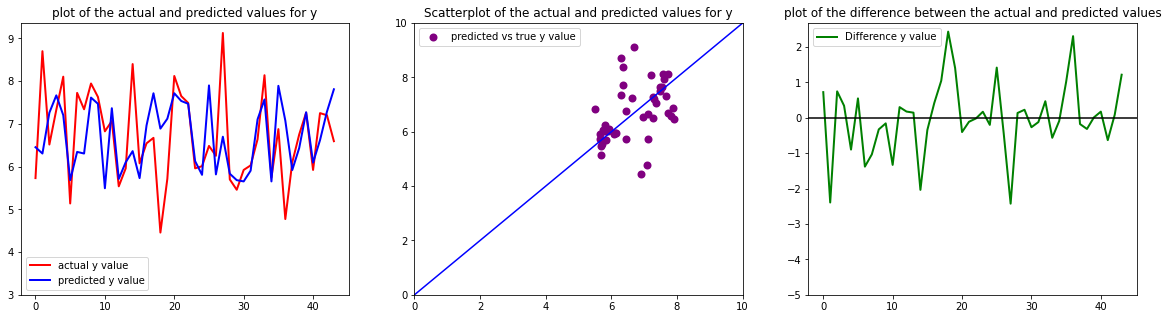

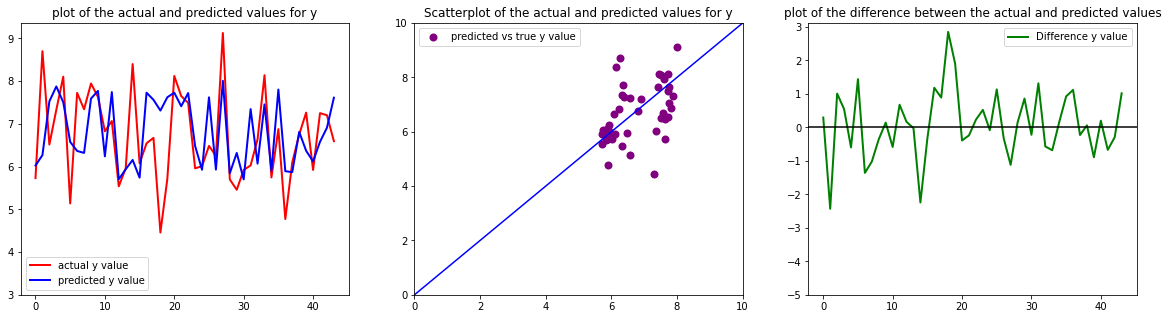

In [63]:
# Parameters
chems = [239] #, 4005, 224
descriptors = ['CATS'] #, 'CDKmolprop', 'constitutional', 'WHIM', 'Druglike', 'MorganFP'
models = ['knn', 'rf', 'svr'] #, 'rf', 'svr'

# For loop that runs all models on all files
for chem in tqdm(chems):
    print(chem)
    for descriptor in descriptors:
        print(descriptor)
        train_data = pd.read_csv(f'../descriptors_data/CHEMBL{chem}_train_{descriptor}.csv')
        test_data = pd.read_csv(f'../descriptors_data/CHEMBL{chem}_test_{descriptor}.csv')
        
        # Get x and y values
        y_train = train_data.loc[:, 'Y'].values.astype(np.float)
        y_test = test_data.loc[:, 'Y'].values.astype(np.float)
        X_train = train_data.iloc[:, 3:].values.astype(np.float)
        X_test = test_data.iloc[:, 3:].values.astype(np.float)
        
        # Scaling the x-values of the training and testing set
        scaler = StandardScaler().fit(X_train)
        
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Create final dataset for the models
        training_dataset = X_train_scaled, y_train
        testing_dataset = X_test_scaled, y_test
        
        # Loop over all model types
        for model in models:
            print(model)
            model_selection(model, training_dataset, testing_dataset, chem, descriptor)

# Models

In [62]:
# K - Nearest Neighbors Model
def KNN_model(train_data, model, chem, descriptor, test_data, distance_type="euclidean"):
    
    # Create training and testing data
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    #print(x_train)
    #print(y_train)
    
    #print(X_train)
    
    # Lists for the visualize function
    list_y_pred_train = []
    list_y_pred = []
    list_y_actual = []
    list_y_diff = []
    
    # Metrics for all number of neighbors
    metrics_KNN_all = []
    
    # Set the parameters to check with GridSearch
    param = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
    
    # GridSearch on KNN
    knn_model = GridSearchCV(KNeighborsRegressor(), param, cv=5, n_jobs=-1, verbose=3).fit(x_train, y_train)
    #print(knn_model.cv_results_)

    # Store the best n_neighbors parameter
    best_param = knn_model.best_params_['n_neighbors']
    
    # Print the best n_neighbors parameter
    print('The best value for the n_neighbors parameter in the KNN model is:', best_param)
    
    #Make KNN with best n_neighbors parameter
    best_knn_model = KNeighborsRegressor(n_neighbors=best_param, n_jobs=-1, metric=distance_type).fit(x_train, y_train)

    # Make prediction
    y_pred_train=best_knn_model.predict(x_train)
    y_pred_knn=best_knn_model.predict(x_test)
        
    # Compute the metrics and store it in the total list of metrics
    metrics_KNN = compute_metric(y_test, y_pred_knn, y_pred_train, y_train, model, chem, descriptor)
    
    for item in y_pred_train:
        list_y_pred_train.append(item)        
    for item in y_pred_knn:
        list_y_pred.append(item)

    for item in y_test:
        list_y_actual.append(item)

    for index in range(0, len(y_test)):
        list_y_diff.append(list_y_pred[index] - list_y_actual[index])
    
    # Create plots of the data
    visualize('knn', chem, descriptor, list_y_actual, list_y_pred, list_y_diff)
        
    return metrics_KNN


# Support Vector Regression Model
def SVR_model(train_data, model, chem, descriptor, test_data):
    
    # Create training and testing data
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    # Lists for the visualize function
    list_y_pred_train = []
    list_y_pred = []
    list_y_actual = []
    list_y_diff = []
    
#     # Set the parameters to check with GridSearch
#     param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

#     # GridSearch on SVR
#     svr_model = GridSearchCV(SVR(), param, cv=5, n_jobs=-1, verbose=0).fit(X_train, y_train)
    
#     # Store the best kernel parameter
#     best_param = svr_model.best_params_['kernel']
    
#     # Print the best kernel parameter
#     print('The best value for the kernel parameter in the SVR model is:', best_param)

    # Make SVR with best kernel parameter
    best_svr_model = SVR(kernel = 'rbf').fit(x_train, y_train)

    # Make prediction
    y_pred_train= best_svr_model.predict(x_train)
    y_pred_svr = best_svr_model.predict(x_test)
    
    # Compute the metrics and store it in the total list of metrics
    metrics_SVR = compute_metric(y_test, y_pred_svr, y_pred_train, y_train, model, chem, descriptor)
    
    for item in y_pred_train:
        list_y_pred_train.append(item)
    for item in y_pred_svr:
        list_y_pred.append(item)

    for item in y_test:
        list_y_actual.append(item)

    for index in range(0, len(y_test)):
        list_y_diff.append(list_y_pred[index] - list_y_actual[index])
        
    # Create plots of the data
    visualize('svr', chem, descriptor, list_y_actual, list_y_pred, list_y_diff)
        
    return metrics_SVR

    
# Random Forest model 
def RF_model(train_data, model, chem, descriptor, test_data):
    
    # Create training and testing data
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    # Lists for the visualize function
    list_y_pred_train = []
    list_y_pred = []
    list_y_actual = []
    list_y_diff = []
    
    #Set the parameters to check with GridSearch
    param = {'n_estimators': [50, 100, 500, 1000]}

    #GridSearch on RandomForestRegressor
    rf_model = GridSearchCV(RandomForestRegressor(), param, cv=5, return_train_score=True, n_jobs=-1, verbose=0).fit(x_train,y_train)
    
    # Store the best n_estimator parameter
    best_param = rf_model.best_params_['n_estimators']
    
    # Print the best n_estimator parameter
    print('The best value for the n_estimator parameter in the RF model is:', best_param)

    # Make randomforest with best value for n_estimator
    best_rf_model = RandomForestRegressor(n_estimators = best_param).fit(x_train, y_train)

    # Make prediction
    y_pred_train=best_rf_model.predict(x_train)
    y_pred_rf=best_rf_model.predict(x_test)

    # Compute regression metrics
    metrics_RF = compute_metric(y_test, y_pred_rf, y_pred_train, y_train, model, chem, descriptor)
    
    for item in y_pred_train:
        list_y_pred_train.append(item)
    for item in y_pred_rf:
        list_y_pred.append(item)

    for item in y_test:
        list_y_actual.append(item)

    for index in range(0, len(y_test)):
        list_y_diff.append(list_y_pred[index] - list_y_actual[index])
    
    # Create plots of the data
    visualize('rf', chem, descriptor, list_y_actual, list_y_pred, list_y_diff)
        
    return metrics_RF

# Metrics

In [15]:
# Function to compute the RMSEP metric
def RMSEP(y_true, y_pred, model, chem, descriptor):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    
    # Compute the actual metric
    RMSEP = np.sqrt(np.sum(np.square(y_true - y_pred))/len(y_test))
    
    # Create CSV for RMSEP computation
    df = pd.DataFrame([RMSEP, y_true, y_pred]).T
    column_names = ['RMSEP', 'y_true', 'y_pred']
    df.to_csv(f"results_RMSEP/{model}_{chem}_{descriptor}_RMSEP_results.csv", header=column_names, index=None)

    return RMSEP

# Function to compute the Q2F3 metric
def Q2F3(y_true, y_pred, y_train, model, chem, descriptor):
    '''
    Compute Q2F metric.
    '''
    
    # Compute the actual metric
    RMSEP = np.sqrt(np.sum(np.square(y_true - y_pred))/len(y_test))
    Q2F3 = (1 - ((np.square(RMSEP)/(np.square(np.std(y_train))))))
    
    # Create CSV for Q2F3 computation
    df = pd.DataFrame([Q2F3, y_true, y_pred, y_train]).T
    column_names = ['Q2F3', 'y_true', 'y_pred', 'y_train']
    df.to_csv(f"results_Q2F3/{model}_{chem}_{descriptor}_Q2F3_results.csv", header=column_names, index=None)
    
    return Q2F3
    

# Compute all metrics
def compute_metric(y_test, y_pred, y_train, y_pred_train, model, chem, descriptor):
    
    # Make lists for metrics
    r2_values = []
    RMSEP_values = []
    Q2F3_values = []
    
    
    # Compute regression metrics
    r2_values.append(r2_score(y_train, y_pred_train))
    RMSEP_values.append(RMSEP(y_test, y_pred, model, chem, descriptor))
    Q2F3_values.append(Q2F3(y_test, y_pred, y_train, model, chem, descriptor))
    
    return r2_values, RMSEP_values, Q2F3_values

def save_metrics(variables, model, chem, descriptor):
    # Add setting to the output list
    output = [model, chem, descriptor]
    
    # Loop over variables and store it into output list 
    for i in range(len(variables)):
        output.append(variables[i])
    
    # Create a pandas dataframe of variables and transpose it
    DF = pd.DataFrame(output).T
    
    # Custom column names
    column_names = ['model', 'chem', 'descriptor', 'r2_value', 'RMSEP', 'Q2F3']
    
    # Store the variables as CSV to disk with custom column names
    DF.to_csv(f"variables/{model}_{chem}_{descriptor}_variables.csv", header=column_names, index=None)

# Model Selection

In [16]:
# Model selection function
def model_selection(model, training_dataset, testing_dataset, chem=None, descriptor=None):
    if model == 'knn':
        
        # Checks if the descriptor is MorganFP, applies jaccard when true as distance metric. 
        # Otherwise uses default euclidean distance
        if descriptor == 'MorganFP':
            distance_type = "jaccard"
        else:
            distance_type= "euclidean"
            
        variables = KNN_model(training_dataset, model, chem, descriptor, testing_dataset, distance_type)
        save_metrics(variables, model, chem, descriptor)
        
    elif model == 'rf':
        variables = RF_model(training_dataset, model, chem, descriptor, testing_dataset)
        save_metrics(variables, model, chem, descriptor)
        
    elif model == 'svr':
        variables = SVR_model(training_dataset, model, chem, descriptor, testing_dataset)
        save_metrics(variables, model, chem, descriptor)
        
    else:
        print('Error! This is not a valid model name. Select knn, rf or svr.')
    return

# Visualization

In [17]:
# Visualize data
def visualize(model, chem, descriptor, y_actual, y_pred, y_diff):
    
    # Make plots
    fig, axes = plt.subplots(1, 3,  figsize=(20, 5))
    axes[0].plot(y_actual, lw=2, color="red", label="actual y value")
    axes[0].set_ylim(ymin=3)
    axes[0].plot(y_pred, lw=2, color="blue", label="predicted y value")
    axes[0].legend()
    axes[0].set_title('plot of the actual and predicted values for y')

    axes[1].scatter(y_pred,y_actual, lw=2, color="purple", label="predicted vs true y value")
    axes[1].set_ylim(ymin=0, ymax=10)
    axes[1].set_xlim(xmin=0, xmax=10)
    axes[1].plot([0, 1], [0, 1], transform=axes[1].transAxes, color="blue")
    axes[1].legend()
    axes[1].set_title('Scatterplot of the actual and predicted values for y')

    axes[2].plot(y_diff, lw=2, color="green", label="Difference y value")
    axes[2].set_ylim(ymin=-5)
    axes[2].axhline(y=0, color='black')
    axes[2].legend()
    axes[2].set_title('plot of the difference between the actual and predicted values')
    
    fig.savefig(f'images/{model}_{chem}_{descriptor}.png')

# Model selection

Run a specific model on a specific training and testing set. The chem and descriptor parameters can be null.

In [ ]:
# Select knn, rf or svr
model_selection('knn', training_dataset, testing_dataset)